# Problem Solving 01
_____
## Replication of a paper published by Dr. Jessica Goldberg - "Experimental Evidence about Labor Supply in Rural Malawi"

> #### Original paper, published by **_American Economic Journal_** in 2016 can be found **[here](https://drive.google.com/file/d/18QQqtV2gj5xQBtjcXm9OIFUcILiN7vYD/view?usp=sharing)**

_______________________

In this session, we work on a paper that analysis labor supply in Malawi in an experimental setting.

_Abstract: I use a field experiment to estimate the wage elasticity of employment in the day labor market in rural Malawi. Once a week for 12 consecutive weeks, I make job offers for a workfare-type program to 529 adults. The daily wage varies from the tenth to the ninetieth percentile of the wage distribution, and individuals are entitled to work a maximum of one day per week. In this context (the low agricultural season), 74 percent of individuals worked at the lowest wage, and consequently the estimated labor supply elasticity is low (0.15), regardless of observable characteristics._

The paper uses data collected by the author and her colleagues in Malawi. They randomly offered jobs with different wages to individuals in 10 villages for 12 consecutive weeks and recorded acceptance rates. They used data to estimate the elasticity of labor supply to wage. 
The variable of interest in this paper is acceptance rate in each village in each week and the explanatory variable is wage.

The other explanatory variables may be variables that distinguish each village from the others.

The main finding of the paper is that in the off-season, the majority of workers accept the job offer at the lowest wage, and the elasticity of labor is low, meaning that the main force of accepting job is probably factors beyond wage.

_loading all the neccessary tools needed for the project:_

In [1]:
%%capture
! pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib.ticker import StrMethodFormatter

## Part 1
-----
loading the dataset

In [2]:
path = "PS03.dta"
df = pd.read_stata(path)
df.head(5)

,week,village,vil_labor,vil_hh,badshock_prev,goodshock_prev,badshock_prev_lnwage,goodshock_prev_lnwage,wage,lnwage,...,wagedum3,wagedum4,wagedum5,wagedum6,wagedum7,wagedum8,wagedum9,wagedum10,wagedum11,wagedum12
0,1,CHIMOWA,1.000000,1.0000,NaN,NaN,NaN,NaN,100.0,4.605170,...,0,0,0,0,0,1,0,0,0,0
1,2,CHIMOWA,0.857143,0.7500,0.285714,0.326531,1.169813,1.336929,60.0,4.094345,...,0,1,0,0,0,0,0,0,0,0
2,3,CHIMOWA,0.000000,0.0000,0.448980,0.306122,2.149486,1.465559,120.0,4.787492,...,0,0,0,0,0,0,0,1,0,0
3,4,CHIMOWA,0.897959,0.8125,0.918367,0.183673,3.123549,0.624710,30.0,3.401197,...,0,0,0,0,0,0,0,0,0,0
4,5,CHIMOWA,1.000000,1.0000,0.204082,0.183673,0.959282,0.863354,110.0,4.700480,...,0,0,0,0,0,0,1,0,0,0


### 1.a) First, we have to know our variable of interest, acceptance rate, and the main explanatory variable, wage.

In [3]:
df['vil_labor'].describe()

count    120.000000
mean       0.845476
std        0.171205
min        0.000000
25%        0.809310
50%        0.907692
75%        0.958333
max        1.000000
Name: vil_labor, dtype: float64

By observing dependent variable <code>'vil_labor'</code> we see that the average acceptance rate among the villages was **84%**

In [4]:
df['wage'].describe()

count    120.000000
mean      85.000000
std       34.665264
min       30.000000
25%       57.500000
50%       85.000000
75%      112.500000
max      140.000000
Name: wage, dtype: float64

By observing independent variable <code>'wage'</code> we see that the average offered wage among the villages was **85** Malawi Kwacha

Text(0.5, 1.0, 'Histogram for the A-Rate ')

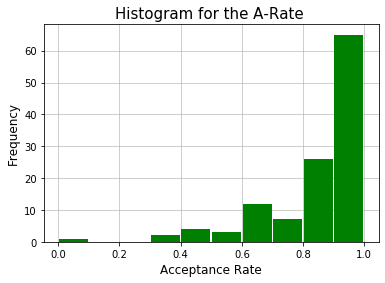

In [5]:
y = df['vil_labor']
plt.hist(y, color='green', zorder=2, rwidth=0.95)
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
plt.ylabel('Frequency',fontsize=12)
plt.xlabel('Acceptance Rate',fontsize=12)
plt.title('Histogram for the A-Rate ',fontsize=15)

### 1.b) I'll Find the mean and standard deviation of acceptance rate for the 20 observations with the lowest wage, 20 observations with the highest wage.

In [6]:
df_wage_labor = df[['wage', 'vil_labor']]
top20 = df_wage_labor.nlargest(20, ['wage', 'vil_labor'])
top20.describe()

,wage,vil_labor
count,20.000000,20.000000
mean,135.000000,0.936237
std,5.129892,0.048356
min,130.000000,0.836735
25%,130.000000,0.902071
50%,135.000000,0.950820
75%,140.000000,0.978941
max,140.000000,1.000000


In [7]:
bottom20 = df_wage_labor.nsmallest(20, ['wage', 'vil_labor'])
bottom20.describe()

,wage,vil_labor
count,20.000000,20.000000
mean,35.000000,0.749579
std,5.129892,0.166202
min,30.000000,0.302326
25%,30.000000,0.652975
50%,35.000000,0.794005
75%,40.000000,0.856280
max,40.000000,0.959184


It is a good idea to compare the acceptance rate for the bottom and upper 20 villages. Based on this observations, even that the mean wage for the top 20 is **286%** more than for the bottom *(avg. for the top 20 is 135 Kwacha; avg. for the bottom is 35 Kwacha)*, we see that there is a small gap of **18.66%** in acceptance rate between those two groups *(93.62% acceptance rate for the top and 74.96% for the bottom)*

##### There is not enough evidence to assume that wages influence if residents of the village accept the job or not


### 1.c.) Find the correlation coefficient between wage and acceptance rate.

In [8]:
x1_corr = df['wage'].corr(df['vil_labor'])

if x1_corr > 0 and x1_corr < 0.5:
    print('We\'ve a WEAK POSITIVE correlation with coeficient of:', x1_corr)
elif x1_corr > 0.5 and x1_corr <= 1:
    print('We\'ve a STRONG POSITIVE correlation with coeficient of:', x1_corr)
elif x1_corr < 0 and x1_corr > -0.5:
    print('We\'ve a WEAK NEGATIVE correlation with coeficient of:', x1_corr)
else:
    print('We\'ve a STRONG NEGATIVE correlation with coeficient of:', x1_corr)

We've a WEAK POSITIVE correlation with coeficient of: 0.34560122231666063


### 1.d) Let’s draw a scatter-graph to visualize the relationship between wage and job acceptance rate
Let's see if this confirms our assumptions that despite the wage differences, people are still willing to accept the job

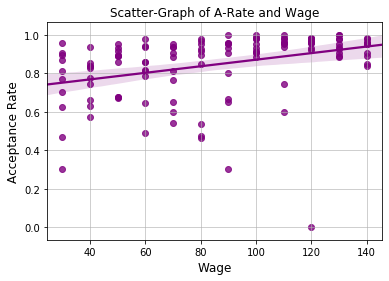

In [9]:
sns.regplot(x="wage", y="vil_labor", data=df, color='purple')
plt.ylabel('Acceptance Rate', fontsize=12)
plt.xlabel('Wage', fontsize=12)
plt.title('Scatter-Graph of A-Rate and Wage')
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)

**Yes!** graph confirms that there is a small influence of the wage offered on if villager accepted the job or not.

## Part 2:
-----------
### 2.a) We run a regression of wage on acceptance rate.

In [10]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [11]:
import statsmodels.formula.api as smf

#The coefficients for wage seems to be small. Generated a new variable that is 1000 times smaller than wage (wage/1000) and use it instead of wage
x = df[['wage']]
y = df['vil_labor']

#running regression acceptance rate on wage
reg = smf.ols('y ~ x', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     16.01
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           0.000111
Time:                        23:38:21   Log-Likelihood:                 49.648
No. Observations:                 120   AIC:                            -95.30
Df Residuals:                     118   BIC:                            -89.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7004      0.039     17.894      0.000       0.623       0.778
x              0.0017      0.000      4.001      0.000       0.001       0.003
==============================================================================
Omnibus:                       83.233   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              475.521
Skew:                          -2.436   Prob(JB):                    5.52e-104
Kurtosis:                      11.448   Cond. No.                         244.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our explanatory <code>'wage'</code> showed to have a strong explanatory power as it's <code>p-value</code> is approx. **0** (which means that we are 99% confident it is statistically significant).
Also, explanatory variable shows that offering of an additional 1 Kwacha increases acceptance rate by **0.0017**

However, if we look that the <code>R-squared</code>, which is the measure of goodness of fit of our model, we see that our model is the explanation of the outcome only by approx. **12%**

In [12]:
#now once again we regress acceptance rate on wages
reg = LinearRegression()

x = df[['wage']]
y = df['vil_labor']

#fitting the model
reg = reg.fit(x, y)

#creating yhat or the prediction line
yhat = reg.predict(x)

### 2.b) We visualize our results:

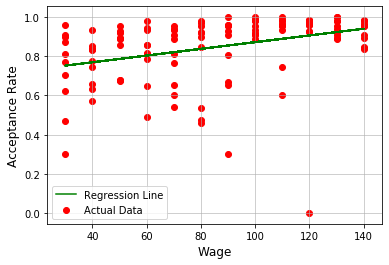

In [13]:
plt.plot(x, yhat, color='green', label='Regression Line')
plt.scatter(x, y, c='red', label='Actual Data')
plt.ylabel('Acceptance Rate', fontsize=12)
plt.xlabel('Wage', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
plt.legend()
plt.show()

### 2.c) Coefficient for the wage is tiny. I will generate new variable 1000x smaller than wage and use it instead

In [14]:
wage1000 = df['wage'] / 1000

reg = smf.ols('y ~ wage1000', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     16.01
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           0.000111
Time:                        23:38:21   Log-Likelihood:                 49.648
No. Observations:                 120   AIC:                            -95.30
Df Residuals:                     118   BIC:                            -89.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7004      0.039     17.894      0.000       0.623       0.778
wage1000       1.7069      0.427      4.001      0.000       0.862       2.552
==============================================================================
Omnibus:                       83.233   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              475.521
Skew:                          -2.436   Prob(JB):                    5.52e-104
Kurtosis:                      11.448   Cond. No.                         29.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we see that any additional _10 Kwacha_ increases acceptance rate by **1.7%**

### 2.d) to make sure that our model is a good model we check if sum of the residuals is equal 0.

In [15]:
print('sum of the residuals is:\t', np.sum(reg.resid))
print('average of the residuals is:\t', np.mean(reg.resid))

sum of the residuals is:	 -4.5075054799781356e-14
average of the residuals is:	 -3.811765717879704e-16


in both cases we see that they are very very close to 0!

## 2.e) Now instead of 'wage' we will run regression using 'lnwage' which is interpreted as a percentage change in wage

In [16]:
lnwage = df['lnwage']

reg = smf.ols('y ~ lnwage', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     15.49
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           0.000140
Time:                        23:38:21   Log-Likelihood:                 49.418
No. Observations:                 120   AIC:                            -94.84
Df Residuals:                     118   BIC:                            -89.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3060      0.138      2.220      0.028       0.033       0.579
lnwage         0.1242      0.032      3.936      0.000       0.062       0.187
==============================================================================
Omnibus:                       82.986   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              464.288
Skew:                          -2.439   Prob(JB):                    1.52e-101
Kurtosis:                      11.311   Cond. No.                         42.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we see that **1%** change in the <code>wage</code> changes acceptance rate by **12.42%.**

### 2.f) Now we just manually compute the regression which was used in the study to calculate the elasticity of the wages
#### regression used in the model is **labor = α + β\*ln(wage) + e**

In [2]:
x = 1
labor = 0.3060 + 0.1242*x
print('Elasticity of the job acceptance is based on wage:',labor)

Elasticity of the job acceptance is based on wage: 0.4302


Even though I used exactly the same model with the same variables from the same dataset my elasticity came to be a little higher than found in the original paper (0.35). This can explain by a small difference in the data. In original data, it appears they got rid of the village which had a 0% acceptance rate (probably there was something happening at that time, so nobody accepted the job), while this data is present in my analysis. However, we still can canclude that findings are somewhat **inelastic**

# Part 3:
-----------
### 3.a) Now in trying to reproduce the other columns of Table 4 of the paper, we would like to calculate two sets of variables called “village effects” and “week effects”. We work only on village effects. Week effects are similar. 

In [18]:
lnwage = df['lnwage']
village = df['village']

reg = smf.ols('y ~ lnwage + C(village)', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     2.752
Date:                Mon, 16 Dec 2019   Prob (F-statistic):            0.00461
Time:                        23:38:21   Log-Likelihood:                 55.524
No. Observations:                 120   AIC:                            -89.05
Df Residuals:                     109   BIC:                            -58.38
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.3228      0.143      2.255      0.026       0.039       0.607
C(village)[T.HASHAMU]             -0.1058      0.065     -1.622      0.108      -0.235       0.023
C(village)[T.KACHULE]             -0.0631      0.065     -0.966      0.336      -0.192       0.066
C(village)[T.KADZINJA/KHUNGWA]     0.0347      0.065      0.531      0.596      -0.095       0.164
C(village)[T.KAFOTOKOZA]           0.0257      0.065      0.394      0.694      -0.104       0.155
C(village)[T.KAMWENDO]             0.0128      0.065      0.195      0.845      -0.117       0.142
C(village)[T.KUNFUNDA]            -0.0855      0.065     -1.310      0.193      -0.215       0.044
C(village)[T.MANASE]              -0.0409      0.065     -0.626      0.532      -0.170       0.088
C(village)[T.MSANGU/KALUTE]        0.0272      0.065      0.418      0.677      -0.102       0.157
C(village)[T.NJONJA]               0.0272      0.065      0.417      0.678      -0.102       0.157
lnwage                             0.1242      0.031      3.980      0.000       0.062       0.186
==============================================================================
Omnibus:                       94.244   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              715.205
Skew:                          -2.719   Prob(JB):                    4.96e-156
Kurtosis:                      13.652   Cond. No.                         51.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After controlling for individual village, we see that effect of a wage on the acceptance rate didn't change, and none of the village variables is statistically significant and the effect on acceptance rate is marginally or non-existence.